# Introducción a Computer Vision

* Vamos a usar open cv
* Vamos a aprender los usos básicos y algunos más avanzados
* *TODO*


<img src="resources/opencv-logo.png" style="width:100px; height:130px;">

# La librería `OpenCV` 

[OpenCV](https://opencv.org/) ("Open Computer Vision") es una librería de código abierto de computer vision (visión artificial) desarrollada originalmente por Intel. Implementada en `C++` pero con APIs en multiples lenguajes, con soporte multiplataforma, es una de las librerías más populares y utilizadas de computer vision. Incluye una gran cantidad de funcionalidad relacionada a la visión artificial, una parte de la cual veremos hoy en esta clase.

La clase se desarrollará como sigue:
* [Parte 1 - Abrir y mostrar imagenes con OpenCV](#Parte-1---Abrir-y-mostrar-imagenes-con-OpenCV)


# Instalación e importaciones

Para instalar las librerías que vamos a usar, descomenten la celda de acá abajo y ejecútenla.

Notar que `OpenCV` se instala como `opencv-python` y se importa como `cv2`, lo cual no es lo mejor.
Una de las librerías


In [1]:
#!pip install matplotlib opencv-python watermark

In [2]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

[watermark](https://github.com/rasbt/watermark) es una extensión de las "magic functions" de jupyter que permite verificar fácilmente la versión de python y de las librerías instaladas.
La notebook está probada con:
```python
Python version : 3.7.13
cv2            : 4.6.0
numpy          : 1.21.6
matplotlib     : 3.5.3
```

In [3]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2022-09-05T23:11:51.625673-03:00

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.34.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-46-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

numpy     : 1.21.6
cv2       : 4.6.0
matplotlib: 3.5.3



# Leer, entender y mostrar imágenes

Ahora sí, ¡empecemos!

Lo primero que tenemos que hacer es cargar una imagen desde el disco rígido. Para hacerlo, usamos `cv2.imread()`, que la convierte automáticamente a una matriz de `numpy`. Esto es diferente de, por ejemplo, la librería PIL, que levanta las imagenes en un formato específico de la librería. En el mundo de OpenCV vamos a estar trabajando siempre con matrices numéricas de numpy

In [21]:
img = cv2.imread("resources/lena.png")
type(img)

numpy.ndarray

In [22]:
img.shape

(512, 512, 3)

¿Qué son estas dimensiones?

Las primeras dos son el alto (_height_) y el ancho (_width_) de la imagen. En este caso tenemos una imagen de _512_ pixeles de alto por _512_ pixeles de ancho. 

El pixel es es la menor unidad homogénea en color que forma parte de una imagen digital. Es un puntito de un color único sólido, el "átomo" del que está hecha la imagen. La forma en que se códifica el color de cada pixel, es usando el conocido espacio de colores RGB con tres números: uno nos va a decir cuánto rojo tiene el pixel, otro cuánto verde y otro cuanto azúl. Rojo, verde y azul son los colores primarios de la luz y componiendolos en términos de intensidad de cada uno de ellos podemos reproducir todo el espectro de colores. Por convención, se usan números entre 0 y 255.

In [38]:
# El pixel de la esquina superior izquierda tiene 125 azul, 137 verde y 226 rojo
# ¿Por qué 125 azul y no 125 rojo? OpenCV usa BGR, lo aclaramos abajo
img[0, 0]

array([125, 137, 226], dtype=uint8)

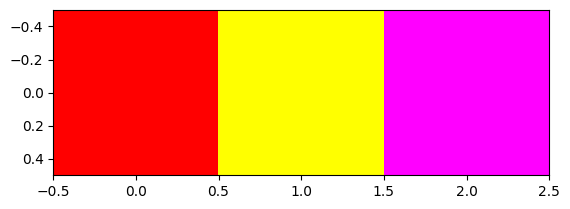

In [43]:
# Acá pueden jugar definiendo pixeles y mostrandolos

# Todo rojo, nada de verde, nada de azul ==> rojo
pixel1 = [255, 0, 0]

# Todo rojo, todo verde, nada de azul ==> amarillo
pixel2 = [255, 255, 0]

# Todo rojo, nada verde, todo azul ==> purpura
pixel3 = [255, 0, 255]

plt.imshow([[pixel1, pixel2, pixel3]]);

**Mostrar con OpenCV**

Para mostrar una imagen con opencv usamos `cv2.imshow()`. 

OpenCV abre una ventana flotante. Para poder cerrarla nosotros y que no se cierre sola, agregamos un loop que verifica si se presiona una tecla cualquiera y cierra la ventana en ese escenario. El código necesario es un poco técnico, pero es siempre el mismo boilerplate.

In [61]:
cv2.imshow("Window", img)

while(True):
    k = cv2.waitKey(33)
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
cv2.destroyAllWindows()

Verifiquemos que los componentes RGB del píxel superior izquierdo con la función de zoom

**Mostrar con matplotlib**

Ya nos adelantamos, pero para mostrar una matriz de numpy como una imagen `RGB` con matplotlib, usamos `imshow`.

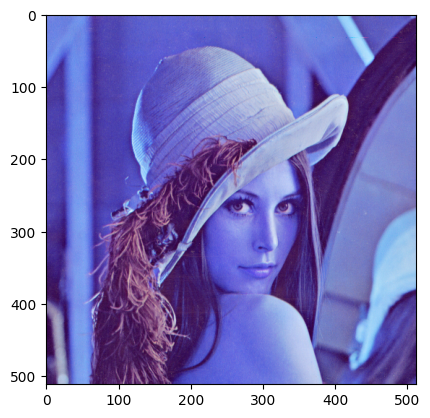

In [44]:
plt.imshow(img);

# Espacios de colores

Ok, la imagen está un poco azul...

Esto es porque opencv trabaja con las imagenes en el espacio de colores BGR (Blue, Green, Red)

Matplotlib, por su parte, como muchas otras librerías, trabaja en RGB (Red, Green, Blue)

Para pasar de un espacio de colores a otro, usamos `cv2.cvtColor()`

In [45]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

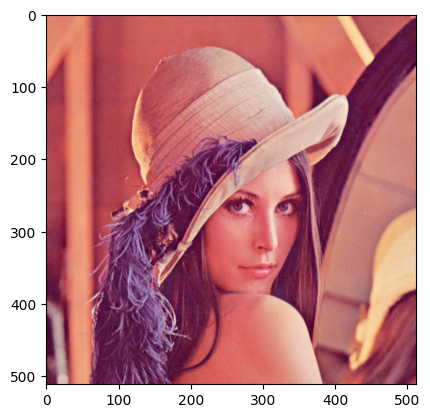

In [47]:
# ¡Ahora sí!
plt.imshow(img_rgb);

Notar que esta transformación no es más que transponer los canales Blue por Red (esto es el primer canal pasarlo al final y el último canal pasarlo al principio), lo que también podemos hacer así:

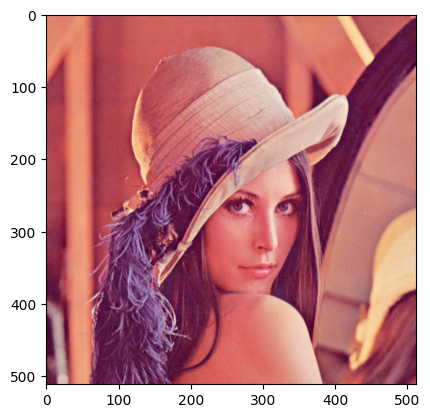

In [48]:
plt.imshow(img[:, :, [2, 1, 0]]);

Pero existen otros espacios de colores... y movernos a ellos no es una transformación tan sencilla.

Por ejemplo, pasar de BGR a escala de grises implica reducir los tres canales de colores a uno solo:

In [49]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(512, 512)

Para esta transformación, la imagen perdió información y ahora cada pixel es simplemente un número entre 0 y 255 indicando "cuán negro" es el pixel

In [59]:
img_rgb[0:2, 0:2]

array([[[226, 137, 125],
        [226, 137, 125]],

       [[226, 137, 125],
        [226, 137, 125]]], dtype=uint8)

In [60]:
img_gray[0:2, 0:2]

array([[162, 162],
       [162, 162]], dtype=uint8)

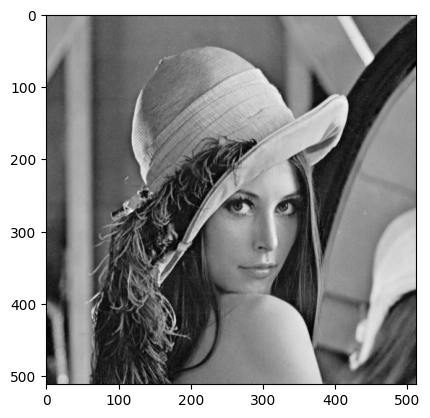

In [52]:
plt.imshow(img_gray, cmap='gray');

Existen [otros espacios de colores](https://es.wikipedia.org/wiki/Espacio_de_color) como el CMYK (Cyan, Magenta, Yellow, Key) utilizado en impresión y el HSV (Hue, Saturation, Value) cuya codificación es a veces mucho más cercana a las intuciones humanas del color (cuando lo usemos más adelante vamos a ver con claridad este caracter más "intuitivo" de HSV).

Todas las transformaciones de espacios de color a otros se hacen con:
`img_dst = cv2.cvtColor(img_src, cv2.COLOR_...)`

# Funciones útiles

## Gaussian Blur es una técnica que desenfoca ("blurea") una imagen. 

El segundo parametro es la "cantidad" de blureado. Probar la siguiente celda con varios números (impares):

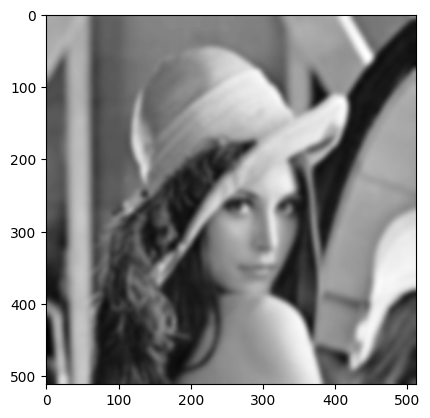

In [134]:
img_blur = cv2.GaussianBlur(img_gray, (21, 21), 0)
plt.imshow(img_blur, cmap='gray');

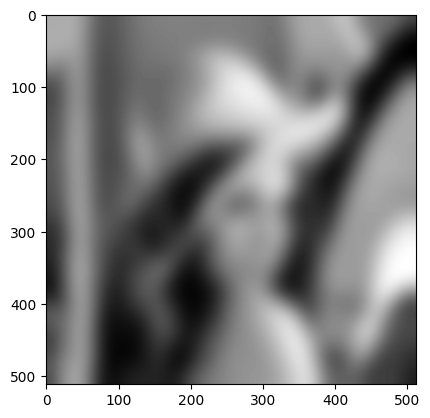

In [135]:
img_blur = cv2.GaussianBlur(img_gray, (101, 101), 0)
plt.imshow(img_blur, cmap='gray');

## Detección de bordes con OpenCV

La técnica se llama Canny en honor su inventor John F. Canny, quien la creo en 1986. 

Para más información ver [Algoritmo de Canny](https://es.wikipedia.org/wiki/Algoritmo_de_Canny).

In [152]:
(cv2.Canny(img, 200, 300) ==  cv2.Canny(img, 300, 200)).all()

True

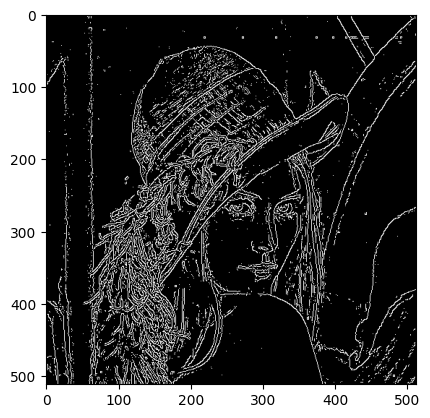

In [167]:
img_canny = cv2.Canny(img, 100, 100)
plt.imshow(img_canny, cmap='gray');

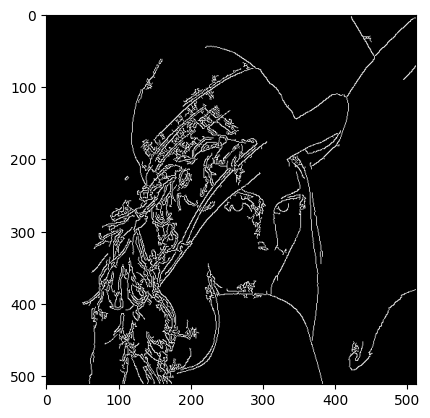

In [176]:
img_canny = cv2.Canny(img, 0, 500)
plt.imshow(img_canny, cmap='gray');

In [166]:
# f, (row1, row2) = plt.subplots(2, 4)
# axes = np.hstack([row1, row2])
# for i, n in enumerate([10, 25, 50, 100, 200, 300, 400, 500]):
#     print(n)
#     img_canny = cv2.Canny(img, n, n)
#     axes[i].imshow(img_canny, cmap='gray');
# plt.show()

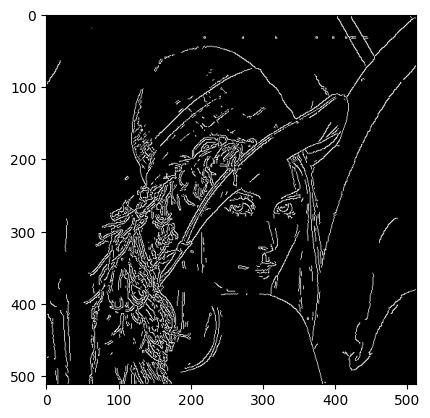

In [177]:
img_canny = cv2.Canny(img, 150, 200)
plt.imshow(img_canny, cmap='gray');

In [186]:
(img_canny == 0).mean()

0.9389114379882812

In [185]:
(img_canny == 255).mean()

0.06108856201171875

Con `cv2.dilate` podemos expanding los bordes detectados para que sean más anchos

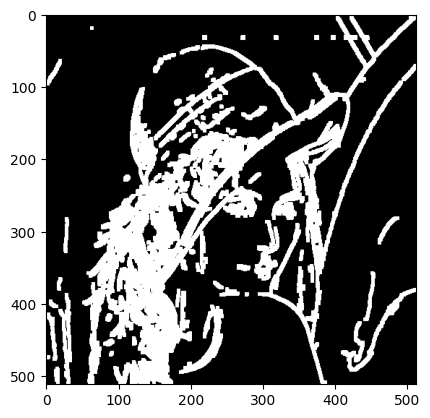

In [194]:
kernel = np.ones((5, 5), np.uint8)

# Con la cantidad de iteraciones, aumentamos el ancho de los bordes
img_dilation = cv2.dilae(img_canny, kernel, iterations=1)
plt.imshow(img_dilation, cmap='gray');

In [198]:
#img_eroded = cv2.erode(img_dilation, kernel, iterations=1)
#plt.imshow(img_eroded, cmap='gray');

In [197]:
#img_eroded = cv2.erode(img_gray, kernel, iterations=3)
#plt.imshow(img_eroded, cmap='gray');

(462, 623, 3)

# Cambiar tamaño y "croppear"

Pasamos a usar otra imagen

Para cambiar de tamaño una imagen usamos `cv2.resize`

In [199]:
img = cv2.imread("resources/lambo.png")
img.shape

(462, 623, 3)

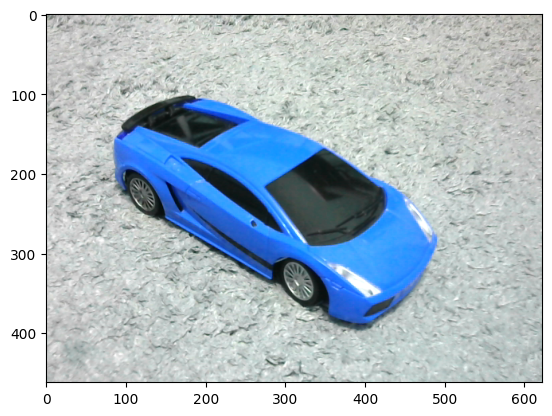

In [204]:
plt.imshow(img);

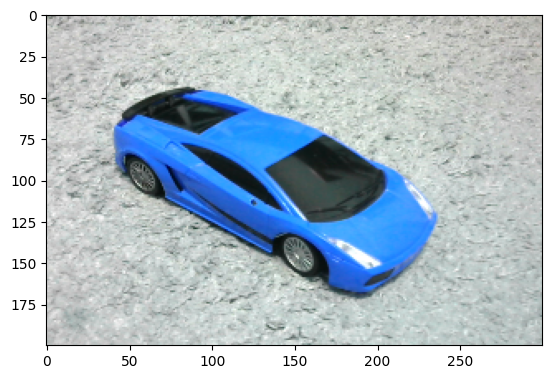

In [207]:
# En resize especificamos primero ancho y despues alto
img_resize = cv2.resize(img, (300, 200))
plt.imshow(img_resize);

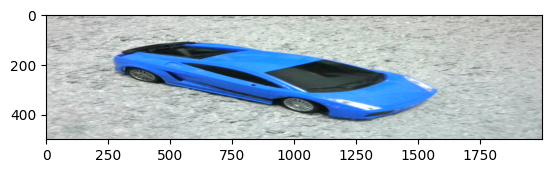

In [208]:
# Primero ancho y despues alto
img_resize2 = cv2.resize(img, (2000, 500))
plt.imshow(img_resize2);

In [209]:
# En los arrays el alto viene primero y el ancho viene despues
img_resize2.shape

(500, 2000, 3)

# Recorte de una imagen (crop)

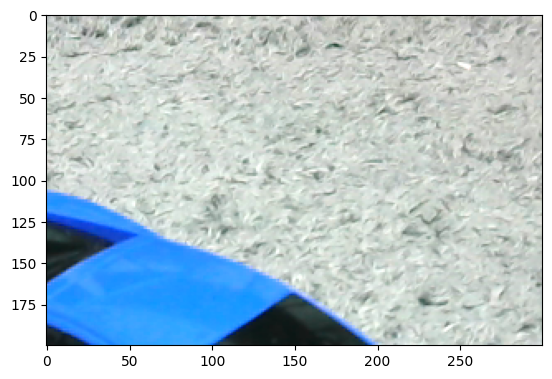

In [210]:
# Primero alto, despues ancho

img_cropped = img[:200, 200:500]
plt.imshow(img_cropped);

# Agregar lineas, figuras geometricas y texto a una imagen

Empezamos con una imagen negra

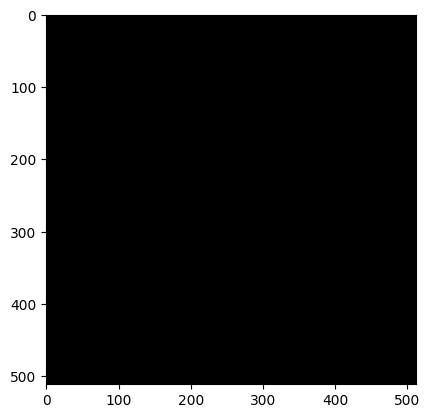

In [251]:
img = np.zeros((512, 512, 3), np.uint8)
plt.imshow(img, cmap='gray');

Para agregar una linea recta usamos `cv2.line()` con los siguientes parametros:
* img: la imagen a la que agregaremos la linea
* pt1: una tupla con las coordenadas en pixeles de donde empieza la linea. Por ejemplo: (0, 0)
* pt2: una tupla con las coordenadas en pixeles de donde termina la linea. Por ejemplo: (10, 50)
* color: una tupla con el color (r, g, b)
* thichness: el alcho de la linea

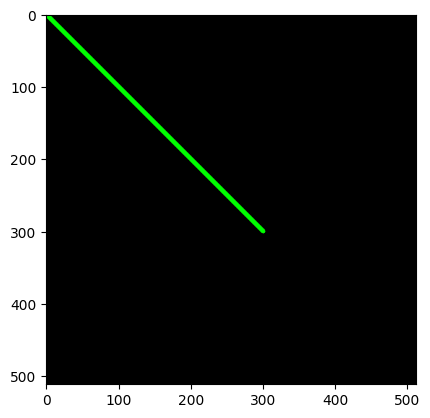

In [252]:
cv2.line(img, pt1=(0, 0), pt2=(300, 300), color=(0, 255, 0), thickness=5)
plt.imshow(img);

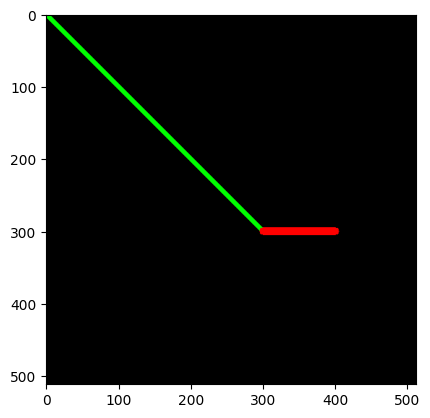

In [253]:
cv2.line(img, pt1=(300, 300), pt2=(400, 300), color=(255, 0, 0), thickness=10)
plt.imshow(img);

Para agregar un rectángulo usamos `cv2.rentangle` con los mismos parametros que usa `cv2.line`. Los dos puntos elegidos, en lugar de definir una linea, van a usarse como dos esquinas del rectángulo:

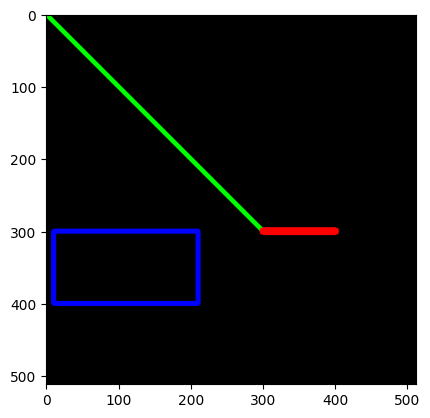

In [254]:
cv2.rectangle(img, (10, 300), (210, 400), (0, 0, 255), 5)
plt.imshow(img)

Para que esté relleno a "thickness" le pasamos de parametro `cv2.FILLED`

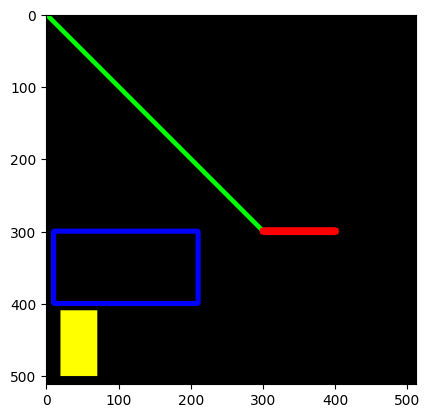

In [255]:
cv2.rectangle(img, (20, 410), (70, 500), (255, 255, 0), cv2.FILLED)
plt.imshow(img);

Para agregar un círculo usamos `cv2.circle` con parámetros:
* img: la imagen a la que agregaremos la linea
* center: tupla con las coordenadas en pixeles de el centro del círculo
* radius: longitud en pixeles del radio del círculo
* color: una tupla con el color (r, g, b)
* thichness: el alcho de la linea

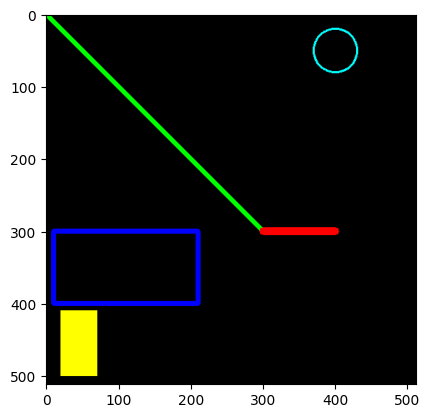

In [256]:
cv2.circle(img, center=(400, 50), radius=30, color=(0, 255, 255), thickness=2)
plt.imshow(img);

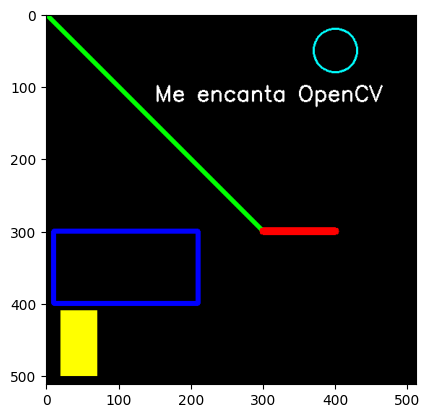

In [258]:
cv2.putText(img, "Me encanta OpenCV", (150, 120),  cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
plt.imshow(img);

# Rotacion

En esta sección vamos a recortar una de las cartas, extraerla y rotarla para que se vea de frente

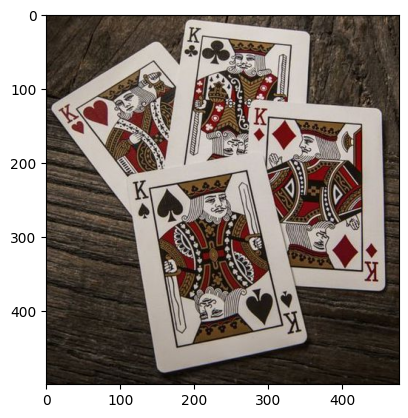

In [259]:
img = cv2.cvtColor(cv2.imread("resources/cards.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [260]:
img.shape

(500, 477, 3)

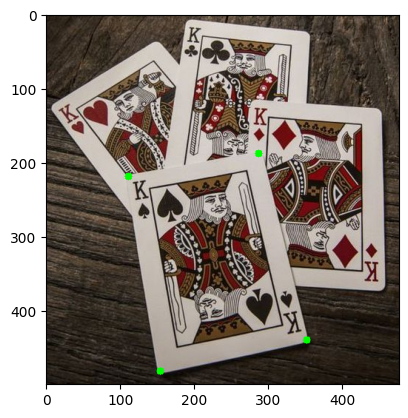

In [270]:
# Estos son las posiciones de las cuatro esquinas de la carta:

for x, y in [(111, 219), (287, 188), (154, 482), (352,  440)]:
    cv2.circle(img, (x,y), radius=0, color=(0, 255, 0), thickness=10)
plt.imshow(img);

In [261]:
w, h = 250, 350

In [262]:
pts1 = np.float32([[111, 219], [287, 188], [154, 482], [352,  440]])
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

In [263]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)

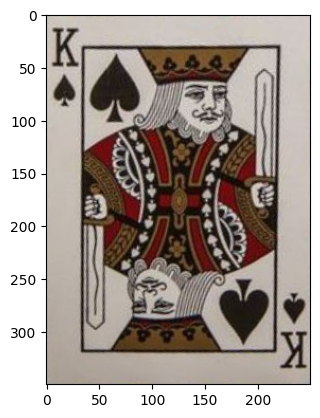

In [72]:
img_output = cv2.warpPerspective(img, matrix, (w, h))
plt.imshow(img_output);

# Stacking

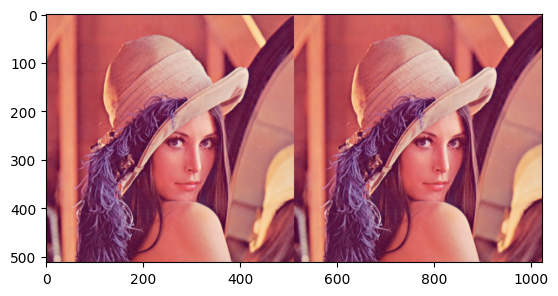

In [76]:

img = cv2.imread("resources/lena.png")[:, :, [2, 1, 0]]

hor = np.hstack((img, img))
plt.imshow(hor);

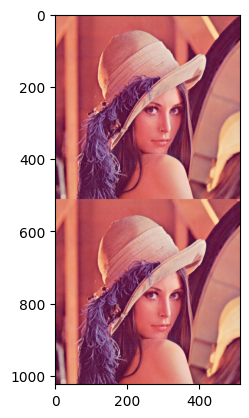

In [77]:
ver = np.vstack((img, img))
plt.imshow(ver);

# Face detection - Viola and Jones

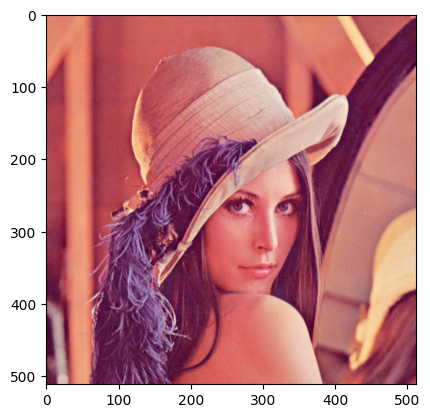

In [3]:
from utils import stackImages, wait_and_close

img = cv2.imread("resources/lena.png")
plt.imshow(img[:, :, [2, 1, 0]]);

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier("resources/haarcascades/haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(img_gray, 1.1, 4)
len(faces)

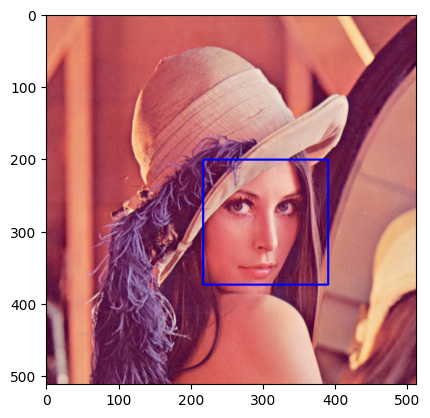

In [7]:
x, y, w, h = faces[0]
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
plt.imshow(img[:, :, [2, 1, 0]]);

# Video

In [6]:
cap = cv2.VideoCapture("resources/face_mesh.mp4")

In [9]:
while True:
    success, img = cap.read()
    if not success: 
        break

    cv2.imshow("Video", img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

# De acá en adelante no sé entra o no

* Webcam - no sé cómo grabar y a la vez mostrar una webcam funcionando
* El resto, dependiendo el tiempo usado previamente, podría hacerse uno (Color detection o shape detection). Y sacaría la parte del stacking (haría varias ventanas flotantes)
* No sé si esto funciona en collab, podría estar bueno ver eso

# Webcam

In [10]:
cap = cv2.VideoCapture(2)
cap.set(3, 640)
cap.set(4, 480)

# Brightness
cap.set(10, 400)

while True:
    success, img = cap.read()

    if not success: 
        break

    cv2.imshow("Video", img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@47.564] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video2): can't open camera by index


# Color detection

In [107]:
img = cv2.imread("resources/lambo.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [108]:
def empty(x):
    print(x)

In [109]:
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

In [110]:
cv2.namedWindow("TrackBars")
#cv2.imshow("TracksBar", img)
cv2.resizeWindow("TrackBars", 640, 240)
cv2.createTrackbar("Hue Min", "TrackBars", 0, 255, empty)
cv2.createTrackbar("Hue Max", "TrackBars", 19, 255, empty)
cv2.createTrackbar("Sat Min", "TrackBars", 110, 255, empty)
cv2.createTrackbar("Sat Max", "TrackBars", 240, 255, empty)
cv2.createTrackbar("Val Min", "TrackBars", 153, 255, empty)
cv2.createTrackbar("Val Max", "TrackBars", 255, 255, empty)


while(True):
    
    h_min = cv2.getTrackbarPos("Hue Min", "TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min, h_max, s_min, s_max, v_min, v_max)
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(img_hsv, lower, upper)
    
    img_result = cv2.bitwise_and(img, img, mask=mask)
    
    #cv2.imshow("Original", img)
    #cv2.imshow("HSV", img_hsv)
    #cv2.imshow("Mask", mask)
    
    #cv2.imshow("Extracted image", img_result)
    
    stacked = stackImages(0.6, [[img, img_hsv], [mask, img_result]])
    cv2.imshow("TrackBars", stacked)
    
    k = cv2.waitKey(33)
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
cv2.destroyAllWindows()

0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 

TypeError: 'tuple' object is not callable

0 20 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 23 110 240 153 255


TypeError: 'tuple' object is not callable

0 24 110 240 153 255
0 24 110 240 153 255


TypeError: 'tuple' object is not callable

0 25 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 27 110 240 153 255


TypeError: 'tuple' object is not callable

0 28 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 31 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 34 110 240 153 255
0 34 110 240 153 255
0 34 110 240 153 255
0 34 110 240 153 255
0 34 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 30 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 28 110 240 153 255


TypeError: 'tuple' object is not callable

0 27 110 240 153 255


TypeError: 'tuple' object is not callable

0 26 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 24 110 240 153 255


TypeError: 'tuple' object is not callable

0 23 110 240 153 255


TypeError: 'tuple' object is not callable

0 22 110 240 153 255


TypeError: 'tuple' object is not callable

0 21 110 240 153 255


TypeError: 'tuple' object is not callable

0 20 110 240 153 255


TypeError: 'tuple' object is not callable

0 19 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 17 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 15 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 13 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 11 110 240 153 255


TypeError: 'tuple' object is not callable

0 10 110 240 153 255


TypeError: 'tuple' object is not callable

0 9 110 240 153 255
0 9 110 240 153 255
0 9 110 240 153 255
0 9 110 240 153 255
0 9 110 240 153 255


TypeError: 'tuple' object is not callable

0 8 110 240 153 255


TypeError: 'tuple' object is not callable

0 7 110 240 153 255
0 7 110 240 153 255


TypeError: 'tuple' object is not callable

0 6 110 240 153 255


TypeError: 'tuple' object is not callable

0 5 110 240 153 255
0 5 110 240 153 255
0 5 110 240 153 255
0 5 110 240 153 255
0 5 110 240 153 255
0 5 110 240 153 255
0 5 110 240 153 255
0 5 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 7 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 12 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

2 15 110 240 153 255


TypeError: 'tuple' object is not callable

3 15 110 240 153 255
3 15 110 240 153 255
3 15 110 240 153 255
3 15 110 240 153 255
3 15 110 240 153 255
3 15 110 240 153 255


TypeError: 'tuple' object is not callable

4 15 110 240 153 255
4 15 110 240 153 255
4 15 110 240 153 255
4 15 110 240 153 255
4 15 110 240 153 255
4 15 110 240 153 255


TypeError: 'tuple' object is not callable

3 15 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 18 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 20 110 240 153 255


TypeError: 'tuple' object is not callable

0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255


TypeError: 'tuple' object is not callable

0 22 110 240 153 255


TypeError: 'tuple' object is not callable

0 23 110 240 153 255


TypeError: 'tuple' object is not callable

0 24 110 240 153 255


TypeError: 'tuple' object is not callable

0 25 110 240 153 255
0 25 110 240 153 255
0 25 110 240 153 255
0 25 110 240 153 255
0 25 110 240 153 255
0 25 110 240 153 255
0 25 110 240 153 255


TypeError: 'tuple' object is not callable

0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255
0 26 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 24 110 240 153 255


TypeError: 'tuple' object is not callable

0 23 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 110 240 153 255


TypeError: 'tuple' object is not callable

0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255


TypeError: 'tuple' object is not callable

0 19 110 240 153 255
0 19 110 240 153 255


TypeError: 'tuple' object is not callable

0 18 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 16 110 240 153 255


TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255


TypeError: 'tuple' object is not callable

0 14 110 240 153 255


TypeError: 'tuple' object is not callable

0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255


TypeError: 'tuple' object is not callable

0 14 110 240 153 255


TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255


TypeError: 'tuple' object is not callable

0 16 110 240 153 255
0 16 110 240 153 255
0 16 110 240 153 255


TypeError: 'tuple' object is not callable

0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255


TypeError: 'tuple' object is not callable

0 16 110 240 153 255
0 16 110 240 153 255


TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255


TypeError: 'tuple' object is not callable

0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255


TypeError: 'tuple' object is not callable

0 13 110 240 153 255
0 13 110 240 153 255


TypeError: 'tuple' object is not callable

0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255


TypeError: 'tuple' object is not callable

0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255


TypeError: 'tuple' object is not callable

0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255


TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255


TypeError: 'tuple' object is not callable

0 16 110 240 153 255
0 16 110 240 153 255
0 16 110 240 153 255
0 16 110 240 153 255


TypeError: 'tuple' object is not callable

0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255


TypeError: 'tuple' object is not callable

0 18 110 240 153 255
0 18 110 240 153 255


TypeError: 'tuple' object is not callable

0 19 110 240 153 255


TypeError: 'tuple' object is not callable

0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 17 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 15 110 240 153 255


TypeError: 'tuple' object is not callable

0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255
0 14 110 240 153 255


TypeError: 'tuple' object is not callable

0 13 110 240 153 255


TypeError: 'tuple' object is not callable

0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255
0 12 110 240 153 255


TypeError: 'tuple' object is not callable

0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255
0 13 110 240 153 255


TypeError: 'tuple' object is not callable

0 14 110 240 153 255
0 14 110 240 153 255


TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255


TypeError: 'tuple' object is not callable

0 16 110 240 153 255


TypeError: 'tuple' object is not callable

0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255


TypeError: 'tuple' object is not callable

0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255


TypeError: 'tuple' object is not callable

0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255


TypeError: 'tuple' object is not callable

0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255


TypeError: 'tuple' object is not callable

0 21 110 240 153 255
0 21 110 240 153 255


TypeError: 'tuple' object is not callable

0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255


TypeError: 'tuple' object is not callable

0 23 110 240 153 255
0 23 110 240 153 255


TypeError: 'tuple' object is not callable

0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255
0 24 110 240 153 255


TypeError: 'tuple' object is not callable

0 23 110 240 153 255


TypeError: 'tuple' object is not callable

0 22 110 240 153 255
0 22 110 240 153 255
0 22 110 240 153 255


TypeError: 'tuple' object is not callable

0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255


TypeError: 'tuple' object is not callable

0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255
0 20 110 240 153 255


TypeError: 'tuple' object is not callable

0 19 110 240 153 255
0 19 110 240 153 255


TypeError: 'tuple' object is not callable

0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255
0 18 110 240 153 255


TypeError: 'tuple' object is not callable

0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255
0 17 110 240 153 255


TypeError: 'tuple' object is not callable

0 16 110 240 153 255
0 16 110 240 153 255
0 16 110 240 153 255


TypeError: 'tuple' object is not callable

0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255
0 15 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 17 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 

TypeError: 'tuple' object is not callable

0 20 110 240 153 255


TypeError: 'tuple' object is not callable

0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255
0 21 110 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 107 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 105 240 153 255


TypeError: 'tuple' object is not callable

0 21 104 240 153 255


TypeError: 'tuple' object is not callable

0 21 103 240 153 255


TypeError: 'tuple' object is not callable

0 21 102 240 153 255


TypeError: 'tuple' object is not callable

0 21 101 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 99 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 97 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 95 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 92 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 87 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 83 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 81 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 78 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 74 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 72 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 68 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 62 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 60 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 56 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 53 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 49 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 44 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 41 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 37 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 34 240 153 255


TypeError: 'tuple' object is not callable

0 21 33 240 153 255


TypeError: 'tuple' object is not callable

0 21 32 240 153 255


TypeError: 'tuple' object is not callable

0 21 31 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 29 240 153 255


TypeError: 'tuple' object is not callable

0 21 28 240 153 255


TypeError: 'tuple' object is not callable

0 21 27 240 153 255


TypeError: 'tuple' object is not callable

0 21 26 240 153 255


TypeError: 'tuple' object is not callable

0 21 25 240 153 255


TypeError: 'tuple' object is not callable

0 21 24 240 153 255


TypeError: 'tuple' object is not callable

0 21 23 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 21 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 17 240 153 255


TypeError: 'tuple' object is not callable

0 21 16 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 14 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 12 240 153 255


TypeError: 'tuple' object is not callable

0 21 11 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 9 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 7 240 153 255


TypeError: 'tuple' object is not callable

0 21 6 240 153 255


TypeError: 'tuple' object is not callable

0 21 5 240 153 255


TypeError: 'tuple' object is not callable

0 21 4 240 153 255


TypeError: 'tuple' object is not callable

0 21 3 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 1 240 153 255


TypeError: 'tuple' object is not callable

0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 6 240 153 255
0 21 6 240 153 255


TypeError: 'tuple' object is not callable

0 21 7 240 153 255


TypeError: 'tuple' object is not callable

0 21 8 240 153 255
0 21 8 240 153 255
0 21 8 240 153 255
0 21 8 240 153 255
0 21 8 240 153 255


TypeError: 'tuple' object is not callable

0 21 9 240 153 255
0 21 9 240 153 255
0 21 9 240 153 255


TypeError: 'tuple' object is not callable

0 21 8 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255
0 21 0 240 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 244 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 248 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 251 153 255
0 21 0 251 153 255
0 21 0 251 153 255
0 21 0 251 153 255
0 21 0 251 153 255
0 21 0 251 153 255
0 21 0 251 153 255
0 21 0 251 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 249 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 233 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 207 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 201 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 197 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 189 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 181 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 179 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 177 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 174 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 171 153 255


TypeError: 'tuple' object is not callable

0 21 0 170 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 168 153 255


TypeError: 'tuple' object is not callable

0 21 0 167 153 255


TypeError: 'tuple' object is not callable

0 21 0 166 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 164 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 161 153 255


TypeError: 'tuple' object is not callable

0 21 0 160 153 255
0 21 0 160 153 255
0 21 0 160 153 255
0 21 0 160 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 157 153 255
0 21 0 157 153 255


TypeError: 'tuple' object is not callable

0 21 0 156 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 154 153 255


TypeError: 'tuple' object is not callable

0 21 0 153 153 255
0 21 0 153 153 255
0 21 0 153 153 255
0 21 0 153 153 255
0 21 0 153 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 157 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 168 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 179 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 183 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 185 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 187 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 190 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 193 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 195 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 0 197 153 255


TypeError: 'tuple' object is not callable

0 21 0 198 153 255


TypeError: 'tuple' object is not callable

0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 153 255
0 21 0 199 1

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 4 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 8 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 12 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 14 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 17 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 21 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 23 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 25 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 29 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 32 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 35 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 42 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 51 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 54 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 58 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 64 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 66 199 153 255


TypeError: 'tuple' object is not callable

0 21 67 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 70 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 72 199 153 255


TypeError: 'tuple' object is not callable

0 21 73 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 75 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 77 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 79 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 82 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 86 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 93 199 153 255


TypeError: 'tuple' object is not callable

0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255
0 21 96 199 153 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 151 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 143 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 139 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 136 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 131 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 129 255


TypeError: 'tuple' object is not callable

0 21 96 199 128 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 126 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 124 255


TypeError: 'tuple' object is not callable

0 21 96 199 123 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 121 255


TypeError: 'tuple' object is not callable

0 21 96 199 120 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 116 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 114 255


TypeError: 'tuple' object is not callable

0 21 96 199 113 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 111 255
0 21 96 199 111 255


TypeError: 'tuple' object is not callable

0 21 96 199 110 255


TypeError: 'tuple' object is not callable

0 21 96 199 109 255


TypeError: 'tuple' object is not callable

0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 247


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 236


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 233


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 225


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 216


TypeError: 'tuple' object is not callable

0 21 96 199 108 215


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 213


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 209


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 205


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 203


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 199


TypeError: 'tuple' object is not callable

0 21 96 199 108 198


TypeError: 'tuple' object is not callable

0 21 96 199 108 197


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 195


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 193
0 21 96 199 108 193
0 21 96 199 108 193
0 21 96 199 108 193


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 199


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 214


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 229


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 232


TypeError: 'tuple' object is not callable

0 21 96 199 108 233


TypeError: 'tuple' object is not callable

0 21 96 199 108 234


TypeError: 'tuple' object is not callable

0 21 96 199 108 235


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 237


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 239


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 242


TypeError: 'tuple' object is not callable

0 21 96 199 108 243
0 21 96 199 108 243


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 246
0 21 96 199 108 246
0 21 96 199 108 246
0 21 96 199 108 246


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 248


TypeError: 'tuple' object is not callable

0 21 96 199 108 249
0 21 96 199 108 249
0 21 96 199 108 249


TypeError: 'tuple' object is not callable

0 21 96 199 108 248


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 235


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 213


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 207


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 200


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 190
0 21 96 199 108 190


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 187


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 185
0 21 96 199 108 185


TypeError: 'tuple' object is not callable

0 21 96 199 108 184


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 182


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 176


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 172


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 169


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 160


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 151


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 145


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 138


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 132


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 127


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 122


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 119


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 117


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 115


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 113


TypeError: 'tuple' object is not callable

0 21 96 199 108 112


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 108
0 21 96 199 108 108
0 21 96 199 108 108


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 113


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 120


TypeError: 'tuple' object is not callable

0 21 96 199 108 121


TypeError: 'tuple' object is not callable

0 21 96 199 108 122


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 126


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 135


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 143


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 149


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 156


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 161


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 167


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 174


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 181


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 188


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 194


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 202


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 207


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 212


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 216


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 219


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 224


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 229


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 234


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 238


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 242


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 246


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 248


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 253


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255
0 21 96 199 108 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 105 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 96 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 94 255


TypeError: 'tuple' object is not callable

0 21 96 199 93 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 89 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 87 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 83 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 79 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 75 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 72 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 68 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 62 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 56 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 48 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 44 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 41 255


TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 

0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255
0 21 96 199 39 255


# Contour / shape detection

In [39]:
from utils import stackImages, wait_and_close

img = cv2.imread("resources/shapes.png")
img_contour = img.copy()
img_contour2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (7, 7), 1)

img_canny = cv2.Canny(img_blur, 50, 50)
img_blank = np.zeros_like(img)

In [40]:
def get_contours(img_canny):
    contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        #print(cnt.shape)
        area = cv2.contourArea(cnt)
        #print(area)
        if area > 6389.0:
            color = (255, 255, 0)
        else:
            color = (255, 0, 255)
        
        cv2.drawContours(img_contour, cnt, -1, color, 3)
        
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02*peri, True)
        x, y, w, h = cv2.boundingRect(approx)
        cv2.rectangle(img_contour, (x, y), (x+w, y+h), (0, 0, 0), 2)
        
        #x, y, w, h = cv2.boundingRect(cnt)
        #cv2.rectangle(img_contour2, (x, y), (x+w, y+h), (0, 0, 0), 2)
        
        obj_cor = len(approx)
        if obj_cor == 3:
            obj_type = "Tri"
        elif obj_cor == 4:
            if 0.9 < w / h < 1.1:
                obj_type = "Sq"
            else:
                obj_type = "Rect"
        else:
            obj_type = "Circle"
        cv2.putText(img_contour2, obj_type, 
                    (x+(w//2)-10, y+(h//2)), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 0), 2)
        #print(approx)
    return cnt
            

In [41]:
cnt = get_contours(img_canny)

In [42]:
img_stack = stackImages(0.8, [[img, img_gray, img_blur],
                             [img_canny, img_contour, img_contour2]])
cv2.imshow("Shape Detection", img_stack)
wait_and_close()